# Project: Wrangling and Analyze Data

In [4]:
# Importing useful libraries for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer



## Data Gathering
In the cells below, **All** three pieces of data for this project are gathered and loaded in the notebook, employing different approaches.


1. WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) is downloaded and loaded into pandas dataframe.

In [5]:
df_doggo = pd.read_csv('twitter-archive-enhanced.csv') 

2. The Requests library is employed to programmatically download the tweet image prediction (image_predictions.tsv) for scalability and reproducibility.

In [6]:
# The url is downloaded programatically and defined. Requests.get method is employed and the tsv file is read into pandas dataframe.

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Writing the contents of the file and saving it to file on the computer

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
# TSV file is read
twitter_image_predict = pd.read_csv('image-predictions.tsv', sep='\t' )

3. Tweepy library is then employed to query additional data via the Twitter API (tweet_json.txt)

In [7]:
#Reading json information of interest ('id,'retweet_count','favorite_count') line by line 
#from tweet-json txt file generated by Udacity and adding it to an empty list tweet_json.

#and put tweet_json list in a pandas dataframe called my_tweet_json.

tweet_json = []
with open('tweet-json.txt', 'r') as j_file:
    lines = j_file.readlines()
    for line in lines:
        tweet_json.append(json.loads(line))

my_tweet_json = pd.DataFrame(tweet_json, columns = ['id','retweet_count','favorite_count'])


my_tweet_json.sample(5)

,id,retweet_count,favorite_count
443,819238181065359361,462,2550
324,833863086058651648,2729,14661
585,799774291445383169,5488,0
742,780459368902959104,1224,5892
1396,699775878809702401,690,2150


## Assessing Data
In this section, I detected and documented eight (8) quality issues and two (2) tidiness issue. I employed both visual assessment and programmatic assessement to assess all the dataframes.







### Visual Assessment of data

In [8]:
df_doggo

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
twitter_image_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
my_tweet_json

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


### Programmatic Assessment

Twitter archive is programmatically assessed first

In [11]:
df_doggo.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
df_doggo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df_doggo.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [14]:
df_doggo.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
df_doggo.duplicated().sum()

0

Programmatic Assessment of  twitter image predict

In [16]:
twitter_image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
twitter_image_predict.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [18]:
twitter_image_predict.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1319,756275833623502848,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1,Airedale,0.602957,True,Irish_terrier,0.086981,True,bloodhound,0.086276,True
279,671109016219725825,https://pbs.twimg.com/media/CVBCFkyU4AE2Wcr.jpg,1,basenji,0.855959,True,beagle,0.036723,True,toy_terrier,0.029258,True
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
1634,805958939288408065,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,1,Irish_setter,0.574557,True,golden_retriever,0.339251,True,seat_belt,0.046108,False
871,697943111201378304,https://pbs.twimg.com/media/Ca-XjfiUsAAUa8f.jpg,1,Great_Dane,0.126924,True,Greater_Swiss_Mountain_dog,0.110037,True,German_short-haired_pointer,0.090816,True


In [19]:
twitter_image_predict.duplicated().sum()

0

Programmatic Assessment of my_tweet_json

In [20]:
my_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
my_tweet_json.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [22]:
my_tweet_json.duplicated().sum()

0

### Quality issues
Quality Issues or dirty data encounted in visual and programmatic assessment of the three (3) dataframes are documented to check for completeness, validity, accuracy, and consitency.

#### dp_doggo dataframe

1. Some columns are not useful for analysis.

2. Datatype of timestamp column is not correct.

3. One column consisting of day, month , and year for the timestamp.

4. Data of doggo, floofer, pupper and puppo columns are not under one column.

5. Some columns have  non-available or null data.

#### twitter_image_predict

6. Too many columns to present image dog prediction.

7. Some columns are not useful in my analysis.

#### my_tweet_json

8. Column 'id' name should be 'tweet_id'.

### Tidiness issues

1. Tidiness Issue 1: A column for computed rating not available.
2. All the 3 tables are not in one dataset for analysis and visualization.

## Cleaning Data
In this section,  I attempt to clean clean all of the issues documented while I assessed the three (3) dataframes. 

**Copies of the original data is made before cleaning is initiated on the dataframe** 


In [23]:
# Making copies of original pieces of data

df_doggo_clean = df_doggo.copy()
twitter_image_predict_clean = twitter_image_predict.copy()
my_tweet_json_clean = my_tweet_json.copy()

### Issue #1: Some columns are not useful for analysis.

#### 1. df_doggo : Delete columns that won't be useful in data analysis

#### Code

In [24]:
# Deleting columns not needed. Columns include not needed include :'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 
                                                    #'retweeted_status_timestamp', 'expanded_urls','source']

print(list(df_doggo_clean))


['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [25]:
df_doggo_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 'expanded_urls','source'], axis = 1, inplace = True)

#### Test

In [26]:
print(list(df_doggo_clean))

['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


### Issue #2: Datatype of timestamp column is not correct.

#### df_doggo 2: Convert datatype of timestamp from object to datetime

#### Code

In [27]:
#converting timestamp to correct datatype datetime
df_doggo_clean['timestamp'] = pd.to_datetime(df_doggo_clean['timestamp'])


#### Test

In [28]:
df_doggo_clean['timestamp'].dtypes

dtype('<M8[ns]')

### Issue #3: One column consisting of day, month , and year for the timestamp 

#### df_doggo 3: Timestamp is separated into day, month, and year

#### Code

In [29]:
# Separating day, month, and year

df_doggo_clean['day'] = df_doggo_clean['timestamp'].dt.day
df_doggo_clean['month'] = df_doggo_clean['timestamp'].dt.month
df_doggo_clean['year'] = df_doggo_clean['timestamp'].dt.year

In [30]:
# Dropping timestamp column
df_doggo_clean.drop(columns = 'timestamp', axis = 1, inplace = True)

#### Test

In [31]:
print(list(df_doggo_clean))  

['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'day', 'month', 'year']


### Issue #4: Data of doggo, floofer, pupper and puppo columns are not under one column. 

#### df_doggo 4: Combining all columns to form one column

#### Code

In [32]:
df_doggo_clean['dog_level'] = df_doggo_clean['doggo'].str.cat(df_doggo_clean[['floofer','pupper','puppo']], sep=',')

In [33]:
# Dropping doggo, floofer, pupper and puppo columns

df_doggo_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

#### Test

In [34]:
df_doggo_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,day,month,year,dog_level
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,1,8,2017,"None,None,None,None"
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,1,8,2017,"None,None,None,None"
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,31,7,2017,"None,None,None,None"
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,30,7,2017,"None,None,None,None"
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,29,7,2017,"None,None,None,None"


### Issue #5: Some columns have  non-available or null data

#### df_doggo 5: Dropping all columns with non-available or null data

#### Code

In [35]:
df_doggo_clean.dropna()

,tweet_id,text,rating_numerator,rating_denominator,name,day,month,year,dog_level
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,1,8,2017,"None,None,None,None"
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,1,8,2017,"None,None,None,None"
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,31,7,2017,"None,None,None,None"
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,30,7,2017,"None,None,None,None"
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,29,7,2017,"None,None,None,None"
5,891087950875897856,Here we have a majestic great white breaching ...,13,10,None,29,7,2017,"None,None,None,None"
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,28,7,2017,"None,None,None,None"
7,890729181411237888,When you watch your owner call another dog a g...,13,10,None,28,7,2017,"None,None,None,None"
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,27,7,2017,"None,None,None,None"
9,890240255349198849,This is Cassie. She is a college pup. Studying...,14,10,Cassie,26,7,2017,"doggo,None,None,None"


#### Test

In [36]:
print(list(df_doggo_clean))

['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 'name', 'day', 'month', 'year', 'dog_level']


In [37]:
df_doggo_clean.isna().sum()

tweet_id              0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
day                   0
month                 0
year                  0
dog_level             0
dtype: int64

### Issue #6: Too many columns to present image dog prediction

#### twitter_image_predict 6: Creating a coloumn to represent image dog prediction 

#### Code

In [38]:
## Creating image dog prediction column

##twitter_image_predict_clean['dog_predict'] = twitter_image_predict_clean['img_num'].apply(lambda x : x == int(0))

In [39]:
## Confiriming newly created columns

print(list(twitter_image_predict_clean))

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']


In [40]:
# Function to select the first true prediction and append it to dog_predict column
dog_typepredict = []
def predict(twitter_image_predict_clean):
    if twitter_image_predict_clean['p1_dog'] == True:
        dog_typepredict.append(twitter_image_predict_clean['p1'])
    elif twitter_image_predict_clean['p2_dog'] == True:
        dog_typepredict.append(twitter_image_predict_clean['p2'])
    elif twitter_image_predict_clean['p3_dog'] == True:
        dog_typepredict.append(twitter_image_predict_clean['p3'])
    else:
        dog_typepredict.append('Please, this is an error')

#series objects having index the image_prediction_clean column.        
twitter_image_predict_clean.apply(predict,axis = 1)

twitter_image_predict_clean['dog_predict'] = dog_typepredict

# Eliminating rows with no true predictions 
twitter_image_predict_clean = twitter_image_predict_clean[twitter_image_predict_clean['dog_predict'] !='Please, this is an error']

#### Test

In [41]:
twitter_image_predict_clean.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_predict
2054,888078434458587136,https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg,1,French_bulldog,0.995026,True,pug,0.000932,True,bull_mastiff,0.000903,True,French_bulldog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True,Pembroke
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True,Siberian_husky
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True,golden_retriever
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True,golden_retriever
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True,whippet
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,golden_retriever
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True,French_bulldog
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True,Pembroke
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False,French_bulldog


### Issue #7: Some columns are not useful in my analysis.

#### tweet_image_predict 7: Drop columns not needed for analysis

#### Code

In [42]:
twitter_image_predict_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis = 1, inplace = True)

#### Test

In [43]:
twitter_image_predict_clean.tail()

,tweet_id,jpg_url,dog_predict
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua


### Issue #8:  Column 'id' name should be 'tweet_id'.

#### my_tweet_json 8: Changing column 'id' name to 'tweet_id'

#### Code

In [44]:
my_tweet_json_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [45]:
my_tweet_json_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


 ## Tidiness Issue 1: A single column for computed rating not available

#### Creating column for computed dog rating over 100  from the rating numerator and the rating denominator in the df_doggo_clean table.

#### Code

In [46]:
#### Percentage rating for dogs

df_doggo_clean['final_rating'] = 100 * df_doggo_clean['rating_numerator'] / df_doggo_clean['rating_denominator']


#### Test

In [47]:
df_doggo_clean.head()

,tweet_id,text,rating_numerator,rating_denominator,name,day,month,year,dog_level,final_rating
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,1,8,2017,"None,None,None,None",130.0
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,1,8,2017,"None,None,None,None",130.0
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,31,7,2017,"None,None,None,None",120.0
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,30,7,2017,"None,None,None,None",130.0
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,29,7,2017,"None,None,None,None",120.0


In [48]:
# Dropping all columns not needed in my analysis

df_doggo_clean.drop(['rating_numerator','rating_denominator'], axis = 1, inplace = True)

In [49]:
## Testing

df_doggo_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id        2356 non-null int64
text            2356 non-null object
name            2356 non-null object
day             2356 non-null int64
month           2356 non-null int64
year            2356 non-null int64
dog_level       2356 non-null object
final_rating    2356 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 147.3+ KB


### Tidiness Issue 2 : All the 3 dataframes are not in one dataset for efficient analysis and visualization.

#### Define 2 : Merging all the 3 dataframes into one data set

#### Code

In [63]:
# Creating an initial dataframe to merge df_doggo and twitter_image_predict joining on tweet_id column

twitter_archive = pd.merge(df_doggo_clean, twitter_image_predict_clean, how = 'right' , on = ['tweet_id'])

#### Test

In [64]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 10 columns):
tweet_id        1751 non-null int64
text            1751 non-null object
name            1751 non-null object
day             1751 non-null int64
month           1751 non-null int64
year            1751 non-null int64
dog_level       1751 non-null object
final_rating    1751 non-null float64
jpg_url         1751 non-null object
dog_predict     1751 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 150.5+ KB


#### Code

In [65]:
#  new dataframe that merge twitter_arcghive and my_tweet_json_clean

twitter_archive_master = pd.merge(twitter_archive, my_tweet_json_clean, how = 'left', on = ['tweet_id'])

#### Test

In [66]:
twitter_archive_master.head()

,tweet_id,text,name,day,month,year,dog_level,final_rating,jpg_url,dog_predict,retweet_count,favorite_count
0,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,1,8,2017,"None,None,None,None",130.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6514.0,33819.0
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,31,7,2017,"None,None,None,None",120.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4328.0,25461.0
2,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,30,7,2017,"None,None,None,None",130.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,8964.0,42908.0
3,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,29,7,2017,"None,None,None,None",120.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,9774.0,41048.0
4,891087950875897856,Here we have a majestic great white breaching ...,None,29,7,2017,"None,None,None,None",130.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,3261.0,20562.0


In [67]:
twitter_archive_master.sample(10)

,tweet_id,text,name,day,month,year,dog_level,final_rating,jpg_url,dog_predict,retweet_count,favorite_count
504,786036967502913536,RT @dog_rates: This is Scout. He really wants ...,Scout,12,10,2016,"None,None,None,None",110.0,https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg,golden_retriever,8237.0,0.0
921,710844581445812225,This is Staniel. His selfie game is strong af....,Staniel,18,3,2016,"None,None,None,None",100.0,https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg,Pembroke,779.0,2775.0
1470,673213039743795200,This is Dexter. He just got some big news. 10/...,Dexter,5,12,2015,"None,None,None,None",100.0,https://pbs.twimg.com/media/CVe7r7QVEAAc4Bg.jpg,schipperke,929.0,2410.0
700,750429297815552001,This is Arnie. He's a Nova Scotian Fridge Floo...,Arnie,5,7,2016,"None,None,None,None",120.0,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,golden_retriever,4947.0,14569.0
1592,669683899023405056,This is Kloey. Her mother was a unicorn. 10/10...,Kloey,26,11,2015,"None,None,None,None",100.0,https://pbs.twimg.com/media/CUsx8q_WUAA-m4k.jpg,Pomeranian,119.0,412.0
1600,669393256313184256,Meet Ronduh. She's a Finnish Checkered Blitzkr...,Ronduh,25,11,2015,"None,None,None,None",100.0,https://pbs.twimg.com/media/CUopnHPVEAAcL2o.jpg,cocker_spaniel,83.0,383.0
393,806219024703037440,We only rate dogs. Please stop sending in non-...,incredibly,6,12,2016,"None,None,None,None",110.0,https://pbs.twimg.com/media/CzBD7MWVIAA5ptx.jpg,chow,1388.0,7145.0
1200,684926975086034944,Meet Bruiser &amp; Charlie. They are the best ...,Bruiser,7,1,2016,"None,None,None,None",110.0,https://pbs.twimg.com/media/CYFZXdiU0AAc_kw.jpg,Labrador_retriever,552.0,3849.0
1130,690597161306841088,This is Lolo. She's America af. Behind in scie...,Lolo,22,1,2016,"None,None,None,None",110.0,https://pbs.twimg.com/media/CZV-c9NVIAEWtiU.jpg,Lhasa,681.0,2163.0
1049,698953797952008193,Meet CeCe. She wanted to take a selfie before ...,CeCe,14,2,2016,"None,None,None,None",110.0,https://pbs.twimg.com/media/CbMuxV5WEAAIBjy.jpg,Italian_greyhound,1020.0,2975.0


In [68]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 12 columns):
tweet_id          1751 non-null int64
text              1751 non-null object
name              1751 non-null object
day               1751 non-null int64
month             1751 non-null int64
year              1751 non-null int64
dog_level         1751 non-null object
final_rating      1751 non-null float64
jpg_url           1751 non-null object
dog_predict       1751 non-null object
retweet_count     1750 non-null float64
favorite_count    1750 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 177.8+ KB


#### Test

In [69]:
twitter_archive_master.head()

,tweet_id,text,name,day,month,year,dog_level,final_rating,jpg_url,dog_predict,retweet_count,favorite_count
0,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,1,8,2017,"None,None,None,None",130.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6514.0,33819.0
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,31,7,2017,"None,None,None,None",120.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4328.0,25461.0
2,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,30,7,2017,"None,None,None,None",130.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,8964.0,42908.0
3,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,29,7,2017,"None,None,None,None",120.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,9774.0,41048.0
4,891087950875897856,Here we have a majestic great white breaching ...,None,29,7,2017,"None,None,None,None",130.0,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,3261.0,20562.0


In [70]:
#### Dropping columns that won't be neccessary in my analysis and visualization.


twitter_archive_master.drop(['dog_level','jpg_url','name','text','day','month','year'], axis = 1, inplace = True )

In [71]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 1750
Data columns (total 5 columns):
tweet_id          1751 non-null int64
final_rating      1751 non-null float64
dog_predict       1751 non-null object
retweet_count     1750 non-null float64
favorite_count    1750 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 82.1+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [72]:
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

## Analyzing and Visualizing Data
In this section, I analyzed and visualized my wrangled dataset to provide insights and enhanced communication

In [73]:
# Dataset for analysis and visualization

twitter_archive_master.head(10)

,tweet_id,final_rating,dog_predict,retweet_count,favorite_count
0,892177421306343426,130.0,Chihuahua,6514.0,33819.0
1,891815181378084864,120.0,Chihuahua,4328.0,25461.0
2,891689557279858688,130.0,Labrador_retriever,8964.0,42908.0
3,891327558926688256,120.0,basset,9774.0,41048.0
4,891087950875897856,130.0,Chesapeake_Bay_retriever,3261.0,20562.0
5,890971913173991426,130.0,Appenzeller,2158.0,12041.0
6,890729181411237888,130.0,Pomeranian,16716.0,56848.0
7,890609185150312448,130.0,Irish_terrier,4429.0,28226.0
8,890240255349198849,140.0,Pembroke,7711.0,32467.0
9,890006608113172480,130.0,Samoyed,7624.0,31166.0


### Insight one  What  predicted dog type had the highest average rating and the lowest average rating ?
 

In [75]:
# Code to group predicted dog types according to their mean of their final ratings.
# Sorting the mean final_rating values to show the maximum and minimum values.

dog_predict_type_mean = twitter_archive_master.groupby('dog_predict')['final_rating'].mean().sort_values()
dog_predict_type_mean

dog_predict
Japanese_spaniel                50.000000
soft-coated_wheaten_terrier     88.000000
Scotch_terrier                  90.000000
Walker_hound                    90.000000
Tibetan_terrier                 92.500000
dalmatian                       93.846154
Boston_bull                     94.166667
Welsh_springer_spaniel          95.000000
Maltese_dog                     95.263158
Dandie_Dinmont                  95.714286
Norwich_terrier                 96.000000
miniature_schnauzer             96.000000
redbone                         96.666667
Scottish_deerhound              97.500000
Rhodesian_ridgeback             97.500000
Great_Dane                      98.181818
Airedale                        98.333333
Newfoundland                    98.571429
Mexican_hairless                98.571429
miniature_poodle                98.750000
groenendael                    100.000000
Brabancon_griffon              100.000000
English_setter                 100.000000
Ibizan_hound          

#### From the analysis above analysis, japanese_spaniel had the lowest average dog ratings and the clumber had the highest dog rating among all the predicted dog types.

### Insight: two Which predicted dog type was commonly rated among all the dog types.

Code to check the frequency/number of counts of predicted dogs

In [76]:
twitter_archive_master['dog_predict'].value_counts()

golden_retriever                  173
Labrador_retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
cocker_spaniel                     34
malamute                           34
French_bulldog                     32
Chesapeake_Bay_retriever           31
miniature_pinscher                 26
Cardigan                           23
Eskimo_dog                         22
Staffordshire_bullterrier          22
German_shepherd                    21
beagle                             21
Siberian_husky                     20
Shih-Tzu                           20
Lakeland_terrier                   19
Maltese_dog                        19
kuvasz                             19
Rottweiler                         19
Shetland_sheepdog                  19
basset      

#### From the above analysis, the golden retriever was the most common rated dog in the dataset

Code to select and group predicted dog types with value counts equals to or greater to 50.

In [77]:
dog_type_freq = twitter_archive_master.groupby('dog_predict').filter(lambda x: len(x) >= 50)
dog_type_freq

,tweet_id,final_rating,dog_predict,retweet_count,favorite_count
0,892177421306343426,130.0,Chihuahua,6514.0,33819.0
1,891815181378084864,120.0,Chihuahua,4328.0,25461.0
2,891689557279858688,130.0,Labrador_retriever,8964.0,42908.0
8,890240255349198849,140.0,Pembroke,7711.0,32467.0
11,889665388333682689,130.0,Pembroke,8538.0,38818.0
13,889531135344209921,130.0,golden_retriever,2321.0,15359.0
15,888917238123831296,120.0,golden_retriever,4709.0,29611.0
16,888804989199671297,130.0,golden_retriever,4559.0,26080.0
18,888202515573088257,130.0,Pembroke,NaN,NaN
21,887473957103951883,130.0,Pembroke,18781.0,69871.0


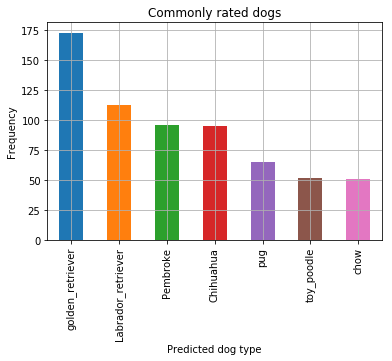

In [78]:
# Code : To plot a bar chart to show the count rate levels of the predicted dog types 

dog_type_freq['dog_predict'].value_counts().plot(kind = 'bar')

plt.xlabel('Predicted dog type') 
plt.ylabel('Frequency')
plt.title('Commonly rated dogs')
plt.grid()

Bar chart visualization showing golden retriever as the most commonly rated dog. 

### Insight three : Do predicted dogs with higher rating counts have high or low average ratings ?

In [80]:
# Calling dog_predict_type_mean variable ( mean of the final ratings, grouped by dog_predict)

dog_predict_rating_average = twitter_archive_master.groupby('dog_predict')['final_rating'].mean()
dog_predict_rating_average

dog_predict
Afghan_hound                      105.000000
Airedale                           98.333333
American_Staffordshire_terrier    103.125000
Appenzeller                       110.000000
Australian_terrier                115.000000
Bedlington_terrier                103.333333
Bernese_mountain_dog              112.727273
Blenheim_spaniel                  112.727273
Border_collie                     105.833333
Border_terrier                    121.428571
Boston_bull                        94.166667
Bouvier_des_Flandres              130.000000
Brabancon_griffon                 100.000000
Brittany_spaniel                  103.750000
Cardigan                          111.739130
Chesapeake_Bay_retriever          108.387097
Chihuahua                         106.038278
Dandie_Dinmont                     95.714286
Doberman                          113.333333
English_setter                    100.000000
English_springer                  104.545455
EntleBucher                       110.00000

In [83]:
# Calling dog_predict_count variable (counts of the final ratings, grouped by dog_predict)
dog_predict_rating_count = twitter_archive_master.groupby('dog_predict')['final_rating'].count()
dog_predict_rating_count

dog_predict
Afghan_hound                        4
Airedale                           12
American_Staffordshire_terrier     16
Appenzeller                         2
Australian_terrier                  2
Bedlington_terrier                  6
Bernese_mountain_dog               11
Blenheim_spaniel                   11
Border_collie                      12
Border_terrier                      7
Boston_bull                        12
Bouvier_des_Flandres                1
Brabancon_griffon                   3
Brittany_spaniel                    8
Cardigan                           23
Chesapeake_Bay_retriever           31
Chihuahua                          95
Dandie_Dinmont                      7
Doberman                            9
English_setter                      9
English_springer                   11
EntleBucher                         1
Eskimo_dog                         22
French_bulldog                     32
German_shepherd                    21
German_short-haired_pointer         8


In [87]:
# Creating a table/dataframe for plotting
dog_predict_rating_count
dog_predict_rating_average
dog_mean_counts = pd.DataFrame(columns = ['dog_predict_rating_count','dog_predict_rating_average'])
# Filling the table with data from dog_predict_rating_count and dog_predict_rating_average
dog_mean_counts['dog_predict_rating_count'] = dog_predict_rating_count
dog_mean_counts['dog_predict_rating_average'] = dog_predict_rating_average

dog_mean_counts 

,dog_predict_rating_count,dog_predict_rating_average
dog_predict,,
Afghan_hound,4,105.000000
Airedale,12,98.333333
American_Staffordshire_terrier,16,103.125000
Appenzeller,2,110.000000
Australian_terrier,2,115.000000
Bedlington_terrier,6,103.333333
Bernese_mountain_dog,11,112.727273
Blenheim_spaniel,11,112.727273
Border_collie,12,105.833333


### Visualization

Text(0.5,1,'Average Rating of Dog Type by Number of Ratings of a Dog')

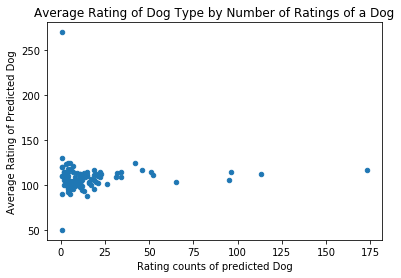

In [89]:
# A scatter plot code to show the variation between average rating of predicted dog types 
#and rating counts of predicted dogs types.

dog_mean_counts.plot(x='dog_predict_rating_count', y='dog_predict_rating_average', kind='scatter')
plt.xlabel('Rating counts of predicted Dog')
plt.ylabel('Average Rating of Predicted Dog')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog')

It can be seen from the visualization above that a high concentated number of predicted dog types with low rating counts depicted lower average ratings betwwn 90 and 125 approximately.

### Insights:
1. Japanese_spaniel has the lowest average predicted dog rating and clumber has the highest predicted dog rating.

2. The golden retriever was the most common predicted dog rated in the dataset followed by labrador retriever.

3. Higher number of predicted dog types with low rating counts showed low average ratings.

### References

1. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html


2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html


3. https://www.kaggle.com/datasets/shamiulislamshifat/weratedogs-twitterapi/code


4. https://www.kaggle.com/code/edemdoehonu/data-wrangling-and-analysis/edit